In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [47]:
def calc_patches(df, num_patches=3):
    flow_emotions = ['joy', 'fear', 'surprise']
    df_new = df.copy()
    df_new = df_new.groupby('start_patch')[flow_emotions].mean().reset_index()
    threshold = max(df_new['start_patch'])/num_patches
    df_new['patch'] = [math.floor(start/threshold) for start in df_new['start_patch']]
    return df_new

In [51]:
PATCH_SIZE = 3
df_vocals_morning = pd.read_csv('../data/hume/processed/Cuban_vocals_morning.csv', index_col=0)
df_vocals_morning_patch = calc_patches(df_vocals_morning,PATCH_SIZE)

df_vocals_afternoon = pd.read_csv('../data/hume/processed/Cuban_vocals_afternoon.csv', index_col=0)
df_vocals_afternoon_patch = calc_patches(df_vocals_afternoon,PATCH_SIZE)

# df_vocals = pd.concat([df_vocals_morning, df_vocals_afternoon])

df_band_morning = pd.read_csv('../data/hume/processed/Funk_band_morning.csv', index_col=0)
df_band_morning_patch = calc_patches(df_band_morning,PATCH_SIZE)


df_band_afternoon = pd.read_csv('../data/hume/processed/Funk_band_afternoon.csv', index_col=0)
df_band_afternoon_patch = calc_patches(df_band_afternoon,PATCH_SIZE)


df_rhythm_morning = pd.read_csv('../data/hume/processed/Funk_rhythm_morning.csv', index_col=0)
df_rhythm_morning_patch = calc_patches(df_rhythm_morning,PATCH_SIZE)

df_rhythm_afternoon = pd.read_csv('../data/hume/processed/Funk_rhythm_afternoon.csv', index_col=0)
df_rhythm_afternoon_patch = calc_patches(df_rhythm_afternoon,PATCH_SIZE)


df_merged = pd.concat([pd.concat([df_vocals_morning, df_vocals_afternoon, df_band_morning,df_band_afternoon, df_rhythm_morning, df_rhythm_afternoon])])
df_merged_patch = pd.concat([pd.concat([df_vocals_morning_patch, df_vocals_afternoon_patch, df_band_morning_patch,df_band_afternoon_patch, df_rhythm_morning_patch, df_rhythm_afternoon_patch])])
df_merged

,anger,disgust,fear,joy,sadness,surprise,neutral,start_patch,start
0,0.039957,0.114220,0.126544,0.169541,0.137182,0.147788,0.157061,0.0,0.10
1,0.037922,0.104910,0.110700,0.190294,0.127883,0.129474,0.150551,0.0,0.20
2,0.044073,0.118693,0.129124,0.167583,0.158697,0.130753,0.167633,0.0,0.30
3,0.041380,0.134487,0.140038,0.133327,0.198558,0.126955,0.179034,0.0,0.40
4,0.047777,0.118812,0.136461,0.141578,0.157510,0.128101,0.191475,0.0,0.50
...,...,...,...,...,...,...,...,...,...
63475,0.074321,0.149759,0.149410,0.091297,0.201079,0.097925,0.242697,140.0,8588.08
63476,0.067359,0.155635,0.145315,0.077353,0.226719,0.081795,0.271931,140.0,8588.20
63477,0.071918,0.149919,0.149765,0.091086,0.218187,0.088475,0.270641,140.0,8588.32
63478,0.063536,0.148344,0.139564,0.079959,0.225815,0.088789,0.313732,140.0,8588.40


# H1: Do we measure more flow state?

Text(0.5, 1.0, 'Mean of Flow and Non-Flow State Emotions')

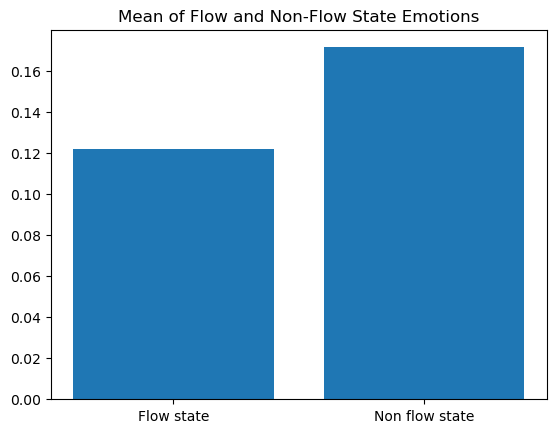

In [5]:
flow_emotions = ['joy', 'fear', 'surprise']
non_flow =['neutral', 'sadness', 'anger']

df_merged['flow'] = df_merged[flow_emotions].mean(axis=1)
df_merged['non_flow'] = df_merged[non_flow].mean(axis=1)
plt.bar(['Flow state', 'Non flow state'], [df_merged['flow'].mean(), df_merged['non_flow'].mean()])
plt.title('Mean of Flow and Non-Flow State Emotions')

In [6]:
from scipy.stats import ttest_rel

# Assuming you have two columns 'column1' and 'column2' in your DataFrame

# Perform paired t-test
t_statistic, p_value = ttest_rel(df_merged['flow'], df_merged['non_flow'])

formatted_p_value = "{:.2f}".format(p_value)
# Print the t-statistic and p-value
print("t-statistic:", t_statistic)
print("p-value:", formatted_p_value)

t-statistic: -1277.5667387012718
p-value: 0.00


# H2: Measuring flow state more in later sessions

Text(0.5, 1.0, 'Mean of flow state emotions over time')

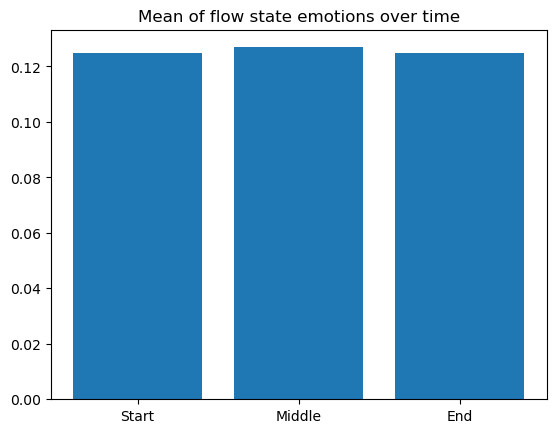

In [52]:
flow_emotions = ['joy', 'fear', 'surprise']

df_merged_patch['flow'] = df_merged_patch[flow_emotions].mean(axis=1)
plt.bar(['Start', 'Middle', 'End'], [df_merged_patch[['flow', 'patch']].loc[df_merged_patch['patch']==0].mean()['flow'], df_merged_patch[['flow', 'patch']].loc[df_merged_patch['patch']==1].mean()['flow'], df_merged_patch[['flow', 'patch']].loc[df_merged_patch['patch']==2].mean()['flow']])
plt.title('Mean of flow state emotions over time')

In [65]:
from scipy.stats import kruskal
# Extract the columns from the DataFrame
patch_1 = df_merged_patch[['flow', 'patch']].loc[df_merged_patch['patch']==0]['flow']
patch_2 = df_merged_patch[['flow', 'patch']].loc[df_merged_patch['patch']==1]['flow']
patch_3 = df_merged_patch[['flow', 'patch']].loc[df_merged_patch['patch']==2]['flow']

# Perform the Kruskal-Wallis test
statistic, p_value = kruskal(patch_1, patch_2, patch_3)

# Print the results
print("Kruskal-Wallis Test")
print(f"Test statistic: {statistic}")
print(f"P-value: {p_value}")


Kruskal-Wallis Test
Test statistic: 3.1438093558563196
P-value: 0.20764930042359708
